In [ ]:
# 题目：鸢尾花数据集聚类
# 背景
# 鸢尾花数据集是一个经典的数据集，包含150个样本，每个样本有4个特征（萼片长度、萼片宽度、花瓣长度、花瓣宽度），目标是将这些样本分成3个不同的类别。

# 数据集
# 数据集：iris.csv，包含150个样本，每个样本有4个特征和一个标签（类别）。
# 数据字段：
# sepal_length：萼片长度。
# sepal_width：萼片宽度。
# petal_length：花瓣长度。
# petal_width：花瓣宽度。
# species：目标变量，表示鸢尾花的种类（Setosa, Versicolor, Virginica）。
# 任务
# 数据预处理：
# 加载数据集。
# 处理缺失值（如果有）。
# 标准化或归一化数值特征。
# 特征工程：
# 选择合适的特征。
# 创建新的特征（可选）。
# 模型训练：
# 选择合适的聚类算法（如K-means、DBSCAN等）。
# 训练模型。
# 模型评估：
# 使用轮廓系数（Silhouette Score）、Calinski-Harabasz指数等指标评估模型性能。
# 可视化聚类结果。
# 结果分析：
# 分析聚类结果，比较聚类结果与实际标签之间的差异。
# 提交要求
# 提交的文件包括：
# code.ipynb：包含完整代码和注释的Jupyter Notebook文件。
# cluster_results.csv：包含聚类结果的CSV文件，格式为：sample_id, cluster_label。
# 评分标准
# 准确性：聚类结果的准确性（占40%）。
# 代码质量：代码的可读性和结构（占30%）。
# 模型性能：模型的性能指标（占30%）。


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt

In [2]:
# 1. 数据预处理
data = pd.read_csv('./iris.csv')

In [3]:
# 分离特征和目标变量
x = data[["sepal_length", 'sepal_width', 'petal_length', 'petal_width']]
y = data['species']

In [5]:
# 标准化特征
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [7]:
# 2. 特征工程（可选）
# 例如，可以创建新的特征或选择特定的特征

# 模型训练
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

In [8]:
# 4. 模型评估
silhouette = silhouette_score(X_scaled, labels)
calinski_harabasz = calinski_harabasz_score(X_scaled, labels)

print(f'Silhouette Score: {silhouette}')
print(f'Calinski-Harabasz Score: {calinski_harabasz}')


Silhouette Score: 0.17991769880174047
Calinski-Harabasz Score: 33.77523090986352


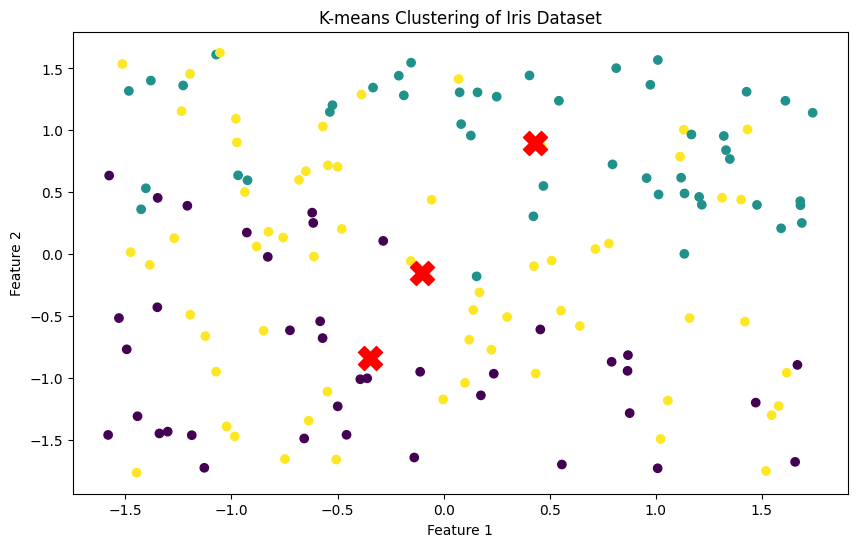

In [9]:
# 5. 可视化聚类结果
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.title('K-means Clustering of Iris Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [10]:
# 6. 结果分析
# 将聚类结果与实际标签进行比较
data['cluster_label'] = labels
print(data[['species', 'cluster_label']].head())

      species  cluster_label
0      Setosa              1
1  Versicolor              2
2  Versicolor              0
3      Setosa              2
4  Versicolor              1


In [11]:
# 保存聚类结果
data[['index', 'cluster_label']].to_csv('cluster_results.csv', index=False)